Imports

In [1]:
from IPython.display import Markdown as md, display
import pandas as pd
from matplotlib import MatplotlibDeprecationWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning, HessianInversionWarning
from RhythmCount import data_processing as dproc
from RhythmCount import plot
import numpy as np

import warnings

# ignore these warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=HessianInversionWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

# Cleaning and analysing the raw data

Southern Ring Road of Ljubljana  Var:  3374499.8176657874  Mean:  3057.687174541948


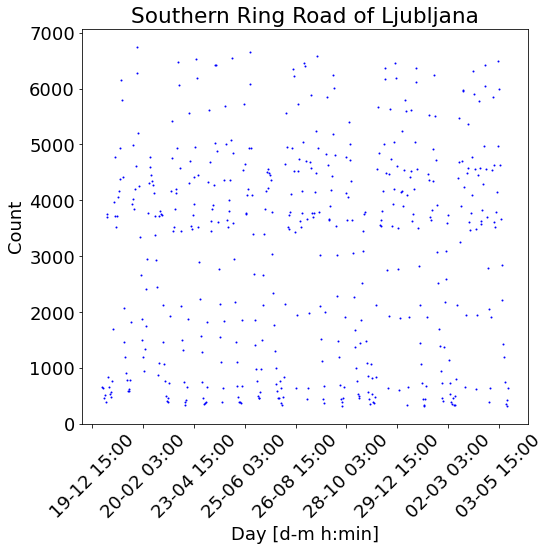

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18,'legend.fontsize': 14})

df = pd.read_csv(r'data\supp_file_0.csv')
df = dproc.clean_data(df)
plot.plot_raw_data(df, "Southern Ring Road of Ljubljana", 1500,save_file_to='supp_file_0_raw.pdf')

# Building models

In [3]:
count_models = ['poisson', 'zero_poisson', 'gen_poisson', 'nb', 'zero_nb']
n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

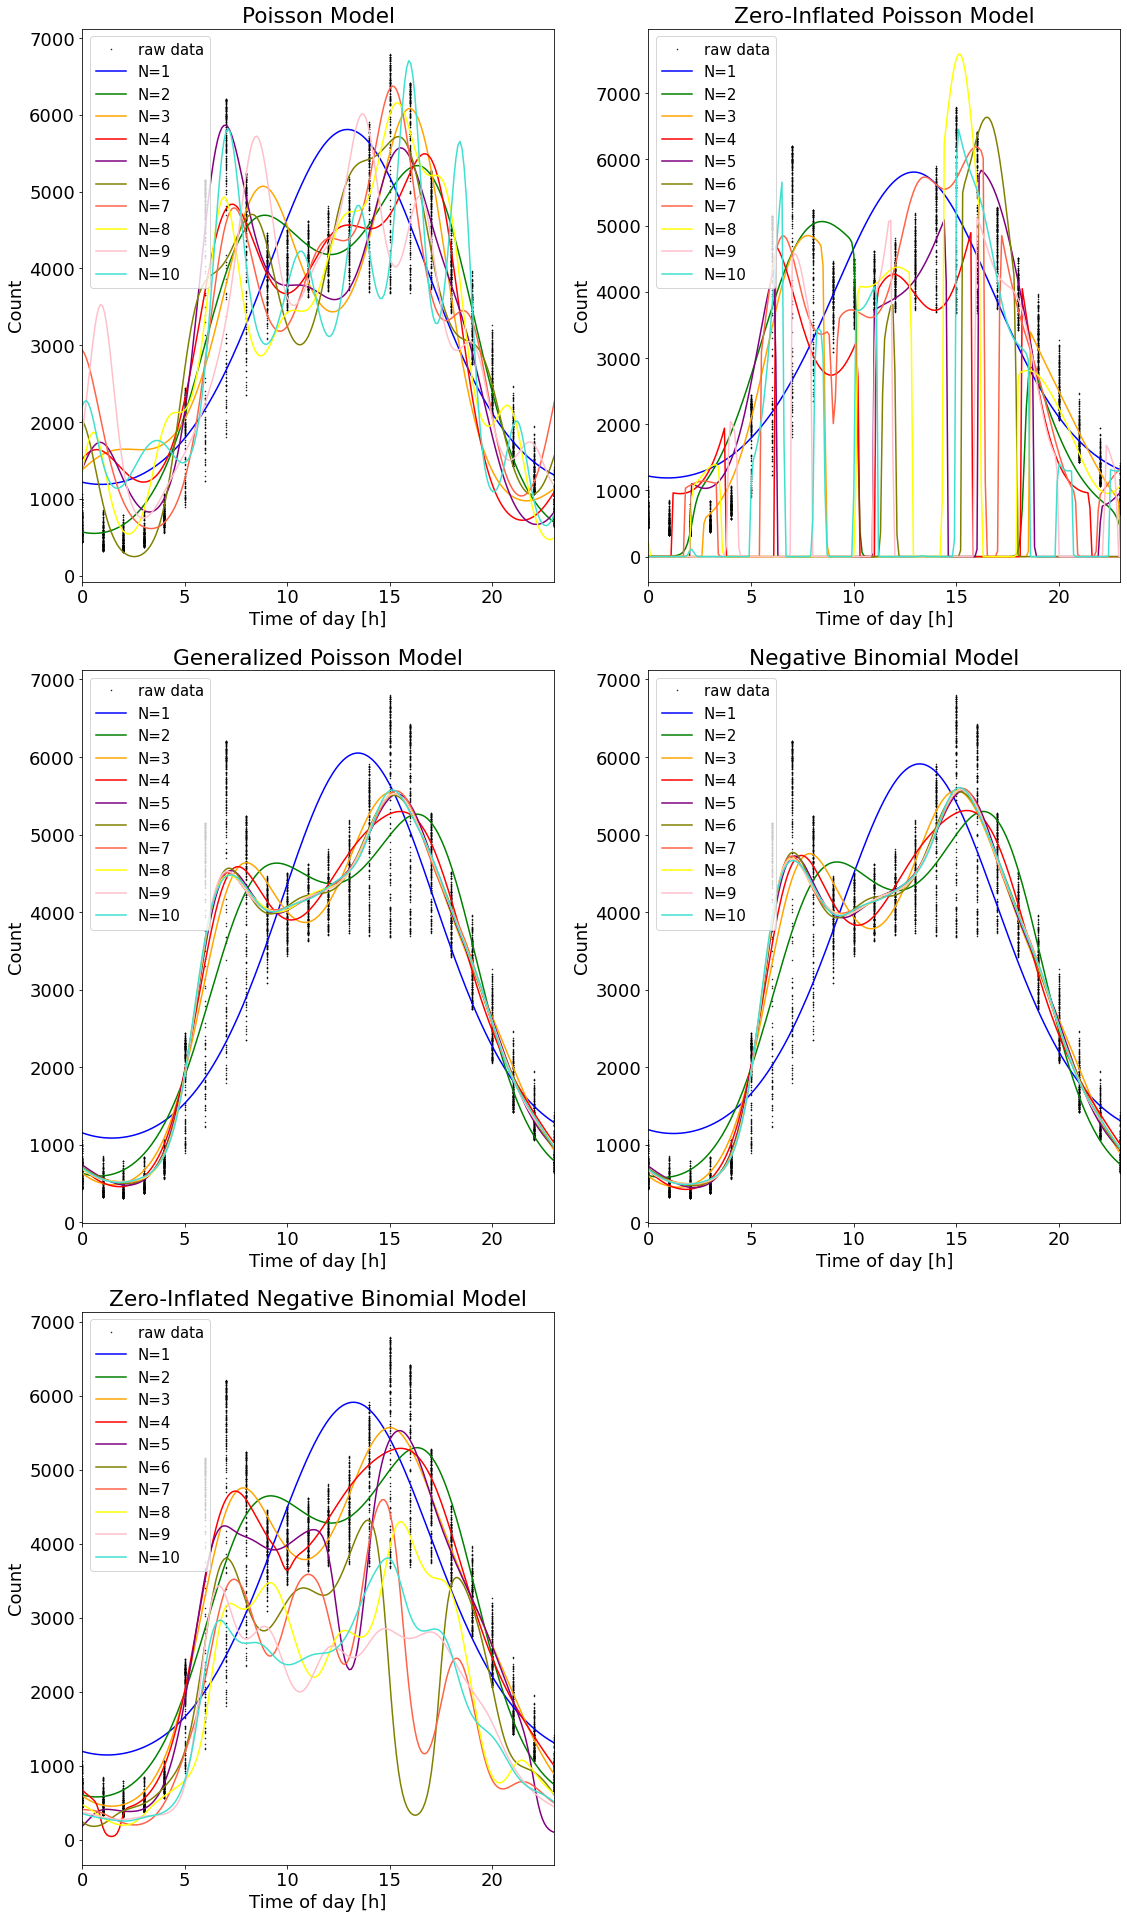

,AIC,BIC,RSS,X_test,Y_est,Y_test,amplitude,count_model,data_mean,data_std,...,llr_pvalue,log_likelihood,logs,mesor,n_components,peaks,prsquared,resid,resid_mean,resid_std
0,2203994.66,2204014.32,6.362619e+09,"[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...","[1188.83, 1226.13, 1332.03, 1216.7, 1188.83, 5...","[1216.7, 1210.95, 1205.87, 1201.45, 1197.69, 1...",2310.54,poisson,3057.69,1836.98,...,0.0,-1101994.33,"[-144.6, -173.53, -391.19, -266.43, -370.28, -...",3499.23,1.0,[12.91],0.67,"[-528.83, -585.13, -876.03, -705.7, -800.83, -...",0.07,1107.75
1,910555.45,910588.22,2.812110e+09,"[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...","[559.87, 663.74, 914.81, 568.9, 559.87, 4301.5...","[568.9, 563.08, 558.4, 554.82, 552.32, 550.91,...",2394.40,poisson,3057.69,1836.98,...,0.0,-455272.73,"[-12.63, -4.54, -145.31, -7.09, -33.49, -40.51...",2944.97,2.0,"[8.91, 16.32]",0.86,"[100.13, -22.74, -458.81, -57.9, -171.87, -540...",-0.04,736.45
2,2272226.59,2272272.46,5.190179e+09,"[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...","[1580.21, 1647.17, 1640.63, 1377.54, 1580.21, ...","[1377.54, 1402.13, 1426.12, 1449.36, 1471.7, 1...",2553.28,poisson,3057.69,1836.98,...,0.0,-1136106.29,"[-348.15, -405.35, -604.77, -363.83, -651.24, ...",3528.61,3.0,"[8.81, 15.92]",0.66,"[-920.21, -1006.17, -1184.63, -866.54, -1192.2...",0.78,1000.50
3,1958391.70,1958450.68,3.874357e+09,"[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...","[1621.25, 1373.11, 1218.57, 1517.8, 1621.25, 3...","[1517.8, 1549.64, 1577.26, 1600.26, 1618.36, 1...",2385.74,poisson,3057.69,1836.98,...,0.0,-979186.85,"[-372.26, -247.95, -318.33, -454.54, -682.33, ...",3108.04,4.0,"[7.31, 13.01, 16.72]",0.71,"[-961.25, -732.11, -762.57, -1006.8, -1233.25,...",2.03,864.42
4,1495687.81,1495759.90,3.321464e+09,"[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...","[1728.4, 1254.16, 850.2, 1392.03, 1728.4, 3760...","[1392.03, 1455.51, 1515.81, 1571.46, 1621.01, ...",2598.22,poisson,3057.69,1836.98,...,0.0,-747832.91,"[-437.17, -187.08, -114.1, -372.97, -764.65, -...",3265.88,5.0,"[7.01, 15.52]",0.78,"[-1068.4, -613.16, -394.2, -881.03, -1340.4, 0...",-1.98,800.37
5,1249147.12,1249232.31,3.267573e+09,"[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...","[950.08, 307.94, 292.32, 2023.86, 950.08, 3107...","[2023.86, 1972.61, 1899.45, 1806.89, 1698.44, ...",2734.34,poisson,3057.69,1836.98,...,0.0,-624560.56,"[-53.8, -141.03, -43.06, -813.56, -218.51, -69...",2982.73,6.0,"[8.31, 15.42]",0.81,"[-290.08, 333.06, 163.68, -1512.86, -562.08, 6...",1.03,793.85
6,2124077.92,2124176.22,4.932691e+09,"[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...","[1912.74, 966.85, 634.02, 2939.4, 1912.74, 393...","[2939.4, 2896.5, 2832.8, 2750.66, 2652.92, 254...",2880.35,poisson,3057.69,1836.98,...,0.0,-1062023.96,"[-554.63, -66.54, -31.71, -1538.4, -909.67, -8...",3493.82,7.0,"[7.41, 15.12]",0.68,"[-1252.74, -325.85, -178.02, -2428.4, -1524.74...",-2.38,975.36
7,1505146.96,1505258.37,3.640825e+09,"[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...","[1521.69, 580.48, 849.29, 1373.06, 1521.69, 34...","[1373.06, 1512.07, 1639.64, 1746.22, 1822.96, ...",2842.97,poisson,3057.69,1836.98,...,0.0,-752556.48,"[-314.53, -7.2, -113.68, -361.01, -607.36, -16...",3313.83,8.0,"[6.91, 15.32, 17.22]",0.77,"[-861.69, 60.52, -393.29, -862.06, -1133.69, 2...",-1.68,837.96
8,2709144.86,2709269.38,7.312447e+09,"[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...","[3507.94, 1415.42, 750.6, 1863.3, 3507.94, 382...","[1863.3, 2062.97, 2284.22, 2520.34, 2761.31, 2...",2630.43,poisson,3057.69,1836.98,...,0.0,-1354553.43,"[-1749.55, -270.8, -71.32, -695.24, -2269.55, ...",3381.12,9.0,"[8.51, 13.61, 16.42]",0.59,"[-2847.94, -774.42, -294.6, -1352.3, -3119.94,...",-56.21,1186.23
9,2471740.90,2471878.53,6.044707e+09,"[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...","[1475.87, 1179.84, 1619.23, 2206.92, 1475.87, ...","[2206.92, 2265.58, 2277.42, 2244.56, 2173.43, ...",3026.52,poisson,3057.69,1836.98,...,0.0,-1235849.45,"[-288.89, -151.91, -58

In [4]:
df_results = dproc.fit_to_models(df, count_models, n_components,save_file_to='supp_file_0_models.pdf')

# round
df_results[['X_test', 'Y_test','Y_est','logs','resid']] = df_results[['X_test', 'Y_test','Y_est','logs','resid']].apply(lambda x: [np.round(i, 2) for i in x ])
df_results=df_results.round(2)

df_results.to_csv(r'results\supp_file_0_results.csv')
display(df_results)

# Comparing the fitted models
## First compare by the count_model parameter

In [5]:
best_count_model = dproc.get_best_count_model(df_results, 'Vuong')
print("Best model: {}".format(best_count_model.count_model))
best_model = dproc.get_best_n_components(df_results, 'Vuong', count_model=best_count_model['count_model'])
print("Number of components: {}".format(best_model.n_components))

Best model: gen_poisson
Number of components: 9.0


## First compare by the n_components parameter

In [6]:
best_n_components = dproc.get_best_n_components(df_results, 'Vuong')
print("Number of components: {}".format(best_n_components.n_components))
best_model = dproc.get_best_count_model(df_results, 'Vuong', n_components=best_n_components['n_components'])
print("Best model: {}".format(best_model.count_model))

Number of components: 7.0
Best model: gen_poisson


We will use the result from the second comparison as the best model.

In [7]:
count_model = best_model.count_model
n_component = int(best_model.n_components)
print("Best model: {}  Number of components: {}".format(best_model.count_model,best_model.n_components))

Best model: gen_poisson  Number of components: 7.0


# Plot the model and its CIs

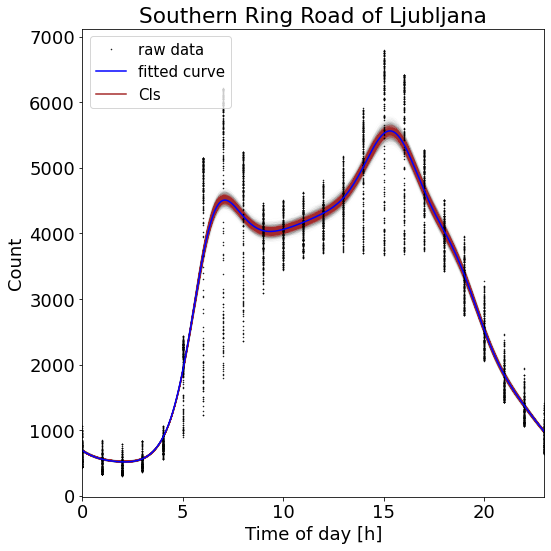

Confidence intervals of model:


,0,1
0,7.770528,7.777708
1,-0.310080,-0.295637
2,-0.989062,-0.974100
3,-0.235466,-0.225401
4,-0.377726,-0.362040
5,-0.186223,-0.171532
6,0.078013,0.089164
7,0.006131,0.016938
8,0.070947,0.086952
9,0.050553,0.065927


In [8]:
CIs=plot.plot_model(df, count_model, n_component, title='Southern Ring Road of Ljubljana',save_file_to='supp_file_0_model.pdf')
print('Confidence intervals of model:')
display(CIs)

# Plot only the CIs of the model

1


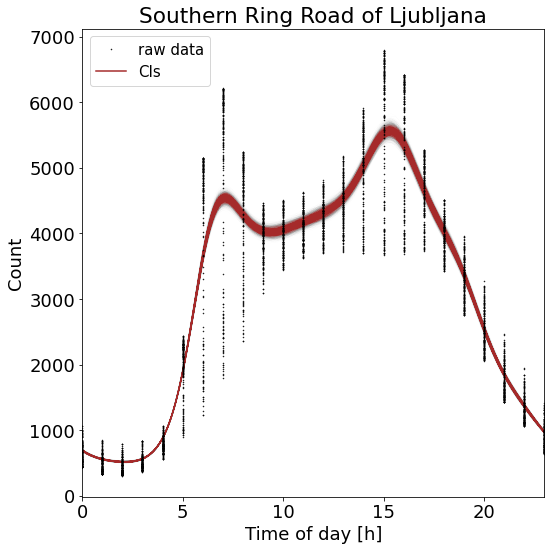

In [9]:
CIs=plot.plot_confidence_intervals(df, count_model, n_component, title='Southern Ring Road of Ljubljana',save_file_to='supp_file_0_CIs.pdf')
CIs.to_csv(r'results\supp_file_0_CIs.csv')

# Calculate the CIs of the rhythm parameters

In [10]:
CIs_params=dproc.calculate_confidence_intervals_parameters(df, n_component, count_model,best_model['peaks'])
best_model = best_model.append(pd.Series(CIs_params))
best_model=best_model[['count_model','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs']]
best_model.to_frame().to_csv(r'results\supp_file_0_CIs_rhythm.csv')
print('Rhythm parameters and its confidence intervals:')
display(best_model.to_frame())

Rhythm parameters and its confidence intervals:


,0
count_model,gen_poisson
n_components,7
amplitude,2522.03
mesor,3040.32
peaks,"[7.11, 15.32]"
heights,"[4508.6, 5562.35]"
amplitude_CIs,"[2475.14, 2571.87]"
mesor_CIs,"[2992.02, 3089.54]"
peaks_CIs,"[[6.98, 7.25], [15.21, 15.45]]"
heights_CIs,"[[4437.96, 4607.67], [5467.55, 5661.02]]"


# Compare by one component - impact of COVID-19
The datasets were pre-cleaned, we removed outliers using the clean_data() function from the data_processing module.
The function compare_by_component() builds and evaluates models for each case separately. It then, calculates the CIs of the model and rhythm parameters.
## All days

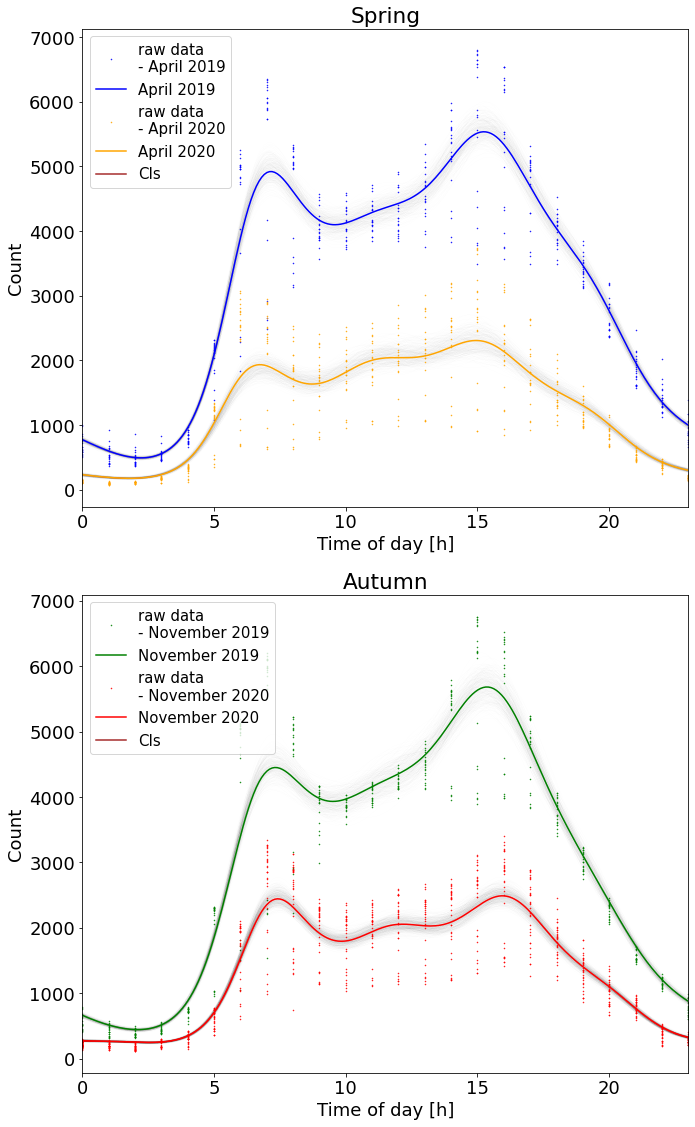

,time_period,count_model,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs,AIC,BIC,log_likelihood,llr_pvalue,prsquared,data_mean,data_std,resid_mean,resid_std
0,April 2019,gen_poisson,5.0,2522.18,3013.87,"[7.21, 15.22]","[4919.8, 5536.05]","[2436.11, 2607.21]","[2938.18, 3085.49]","[[6.99, 7.35], [15.06, 15.38]]","[[4535.56, 5296.45], [5375.12, 5691.88]]",7641.43,7692.10,-3808.72,0.0,0.17,3157.78,1872.04,0.01,582.22
1,November 2019,gen_poisson,5.0,2615.95,3063.80,"[7.31, 15.32]","[4450.64, 5679.76]","[2491.07, 2730.33]","[2938.76, 3170.04]","[[6.93, 7.66], [15.18, 15.53]]","[[4164.69, 4984.95], [5432.88, 5897.32]]",7749.03,7799.70,-3862.52,0.0,0.15,3013.54,1915.37,0.03,654.12
2,April 2020,gen_poisson,5.0,1065.90,1241.10,"[6.71, 11.91, 14.91]","[1933.04, 2042.0, 2307.0]","[984.8, 1210.4]","[1161.81, 1378.77]","[[6.49, 7.06], [10.75, 12.01], [14.54, 15.45]]","[[1649.08, 2198.69], [1925.24, 2156.0], [2146....",7302.54,7353.23,-3639.27,0.0,0.13,1286.70,953.49,-0.00,474.68
3,November 2020,gen_poisson,5.0,1118.82,1371.95,"[7.41, 12.21, 15.92]","[2445.32, 2057.38, 2490.77]","[1068.2, 1181.72]","[1322.62, 1431.5]","[[7.33, 7.54], [11.61, 12.58], [15.76, 16.13]]","[[2307.47, 2579.36], [2012.81, 2184.17], [2373...",11679.05,11735.72,-5827.52,0.0,0.14,1303.75,964.66,-0.01,377.54


In [23]:
df_covid = pd.read_csv(r'data\supp_file_1.csv')
df_results = dproc.compare_by_component(df_covid, 'time_period', n_components, count_models, ax_indices=[1, 2, 1, 2],
                           ax_titles=['Spring', 'Autumn'], rows=2, cols=1,save_file_to='figure1.pdf')
df_results=df_results[['time_period','count_model','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs','AIC','BIC','log_likelihood','llr_pvalue','prsquared','data_mean','data_std','resid_mean','resid_std']]

# round
df_results=df_results.round(2)

df_results.to_csv(r'results\supp_file_4.csv', index=False)
display(df_results)

## Only workdays

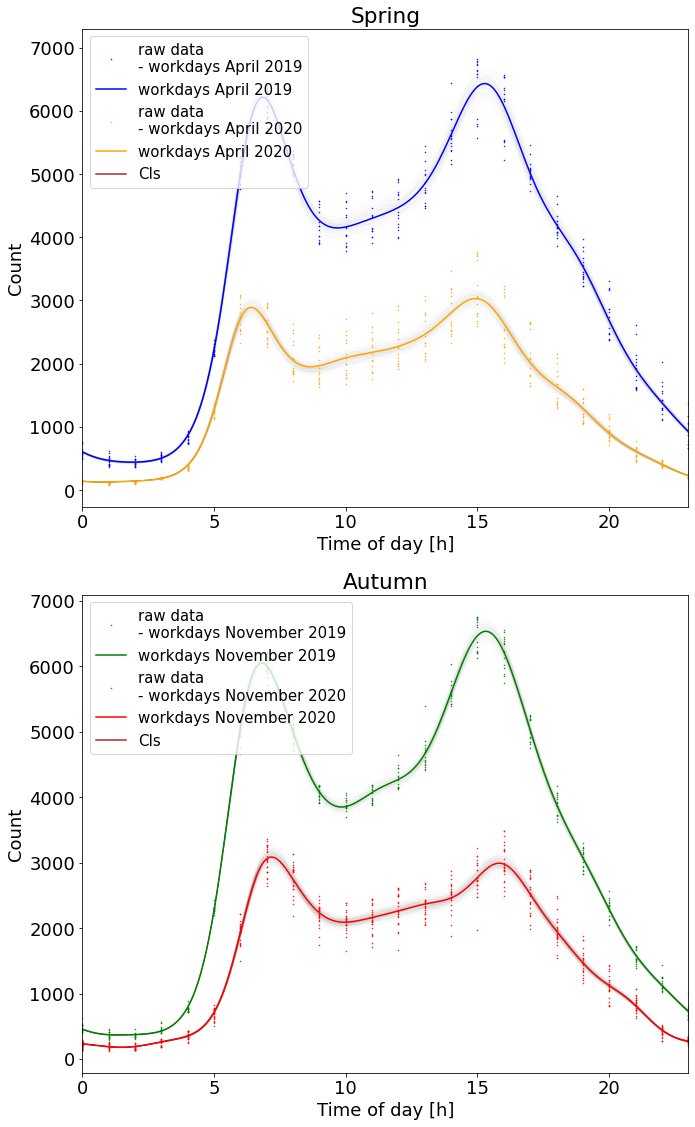

,time_period,count_model,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs,AIC,BIC,log_likelihood,llr_pvalue,prsquared,data_mean,data_std,resid_mean,resid_std
0,workdays April 2019,gen_poisson,7.0,2995.54,3437.10,"[6.81, 15.32]","[6217.27, 6432.65]","[2932.82, 3046.91]","[3372.36, 3494.49]","[[6.75, 6.92], [15.15, 15.39]]","[[6153.07, 6305.84], [6306.25, 6540.33]]",4905.74,4967.92,-2436.87,0.0,0.26,3381.82,2025.72,0.21,245.44
1,workdays November 2019,gen_poisson,8.0,3084.91,3451.80,"[6.81, 15.32]","[6052.79, 6536.7]","[3050.36, 3111.23]","[3410.86, 3480.92]","[[6.81, 6.81], [15.23, 15.41]]","[[6007.22, 6098.34], [6462.52, 6590.84]]",4540.90,4611.00,-2252.45,0.0,0.32,3231.66,2051.43,0.07,141.38
2,workdays April 2020,gen_poisson,7.0,1452.39,1579.27,"[6.41, 14.91]","[2892.09, 3031.66]","[1384.49, 1522.16]","[1509.43, 1647.25]","[[6.35, 6.47], [14.74, 15.14]]","[[2803.54, 2986.61], [2888.66, 3172.4]]",4713.12,4775.30,-2340.56,0.0,0.23,1508.66,1041.48,-0.00,249.87
3,workdays November 2020,gen_poisson,9.0,1454.56,1631.46,"[7.21, 15.82]","[3086.02, 2991.32]","[1432.39, 1479.62]","[1608.16, 1652.28]","[[7.11, 7.27], [15.74, 15.95]]","[[3031.12, 3136.43], [2937.78, 3091.08]]",7763.99,7852.52,-3862.00,0.0,0.25,1459.59,1052.07,0.02,168.69


In [22]:
df_covid = pd.read_csv(r'data\supp_file_2.csv')
df_results = dproc.compare_by_component(df_covid, 'time_period', n_components, count_models, ax_indices=[1, 2, 1, 2],
                           ax_titles=['Spring', 'Autumn'], rows=2, cols=1,save_file_to='figure2.pdf')
df_results=df_results[['time_period','count_model','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs','AIC','BIC','log_likelihood','llr_pvalue','prsquared','data_mean','data_std','resid_mean','resid_std']]

# round
df_results=df_results.round(2)

df_results.to_csv(r'results\supp_file_5.csv', index=False)
display(df_results)

## Only weekends

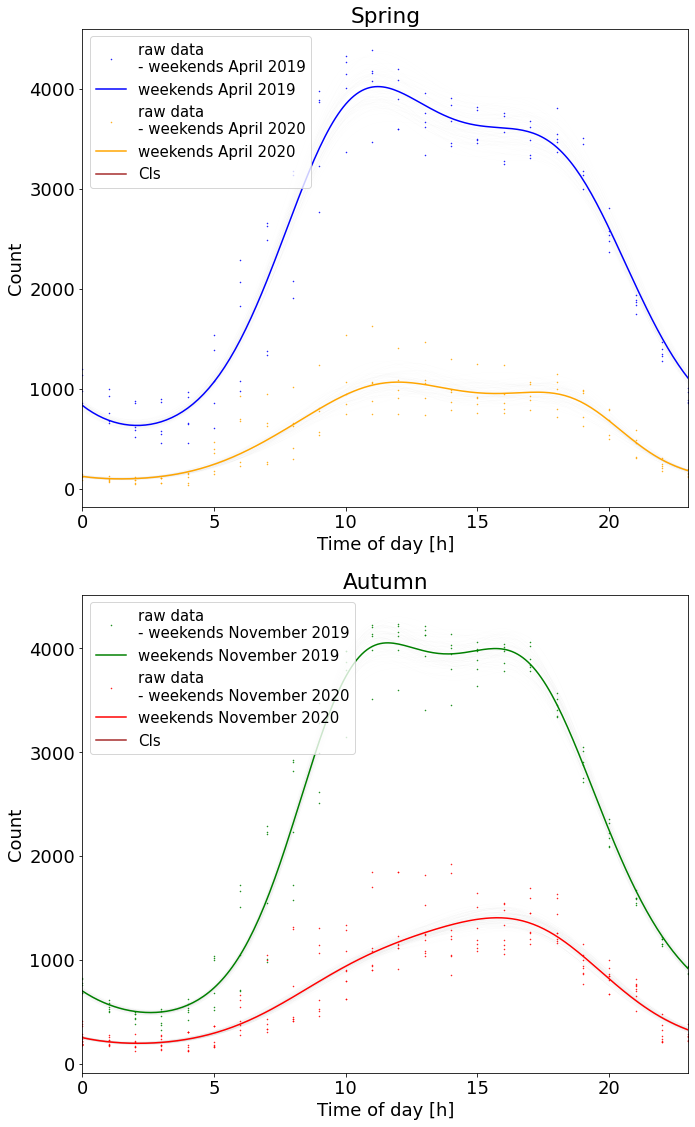

,time_period,count_model,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs,AIC,BIC,log_likelihood,llr_pvalue,prsquared,data_mean,data_std,resid_mean,resid_std
0,weekends April 2019,gen_poisson,2.0,1694.28,2326.76,[11.21],[4021.03],"[1627.37, 1786.88]","[2284.02, 2380.0]","[10.85, 11.53]","[3918.66, 4159.6]",1736.52,1753.24,-862.26,0.0,0.17,2431.49,1278.84,0.0,312.34
1,weekends November 2019,gen_poisson,3.0,1781.03,2272.28,"[11.61, 15.72]","[4053.3, 3998.37]","[1749.64, 1832.62]","[2238.98, 2327.32]","[[11.15, 12.08], [15.22, 16.14]]","[[3978.17, 4156.97], [3937.06, 4055.03]]",2008.53,2032.29,-996.27,0.0,0.20,2314.04,1414.53,-0.0,253.25
2,weekends April 2020,gen_poisson,3.0,483.76,582.08,"[12.01, 17.22]","[1065.84, 965.17]","[440.96, 508.03]","[541.83, 602.83]","[[11.29, 12.79], [16.15, 18.29]]","[[978.81, 1113.1], [915.19, 1027.51]]",1537.07,1559.37,-760.53,0.0,0.15,604.41,405.66,0.0,183.91
3,weekends November 2020,gen_poisson,2.0,604.73,799.73,[15.72],[1404.46],"[580.45, 632.75]","[769.77, 832.87]","[15.36, 16.08]","[1351.88, 1463.95]",2604.00,2623.76,-1296.00,0.0,0.13,728.32,494.22,0.0,215.71


In [21]:
df_covid = pd.read_csv(r'..\data\supp_file_3.csv')
df_results = dproc.compare_by_component(df_covid, 'time_period', n_components, count_models, ax_indices=[1, 2, 1, 2],
                           ax_titles=['Spring', 'Autumn'], rows=2, cols=1,save_file_to='figure3.pdf')
df_results=df_results[['time_period','count_model','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs','AIC','BIC','log_likelihood','llr_pvalue','prsquared','data_mean','data_std','resid_mean','resid_std']]

# round
df_results=df_results.round(2)

df_results.to_csv(r'results\supp_file_6.csv', index=False)
display(df_results)